In [127]:
from tud_sumo.plot import Plotter, MultiPlotter
import pandas as pd
import pickle

trackedEdges=["629633083", "629633083.833", "61121496", "61121498", "54374946" , "126730044" , "126729958" , "126710337" , "1191885785", "699077562", "699077563",  "487223604",  "1191885783",  "1191885780",  "1191885781" , "1191885778", "126730088", "491000664" , "29324581",  "1191885774" , "126730026"]

#mplt.add_simulations(["vsl_off.pkl","vsl_on.pkl"],labels=["VSL Off","VSL On"])



In [70]:
avShares=[0,0.25,0.5,0.75,1]
vslStates=[False,True]

scenarioNames=[]
base="A20_"
ext=".pkl"
for s in avShares:
    for v in vslStates:
        scenarioNames.append(base+str(s)+"_"+str(v)+ext)
print(scenarioNames)

['A20_0_False.pkl', 'A20_0_True.pkl', 'A20_0.25_False.pkl', 'A20_0.25_True.pkl', 'A20_0.5_False.pkl', 'A20_0.5_True.pkl', 'A20_0.75_False.pkl', 'A20_0.75_True.pkl', 'A20_1_False.pkl', 'A20_1_True.pkl']


In [71]:
groups=[[avShares,[False]],[avShares,[True]],[[0,1],[False,True]]] #all shares of AVs without VSL, all shares of AVs with VSL, [0,100]% AV penrate for both VSLs


Loading sim_data files: 100%|██████████| 4/4 [00:00<00:00,  9.66file(s)/s]


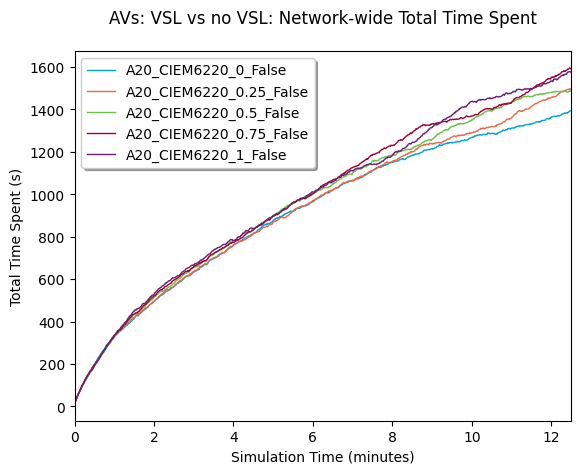

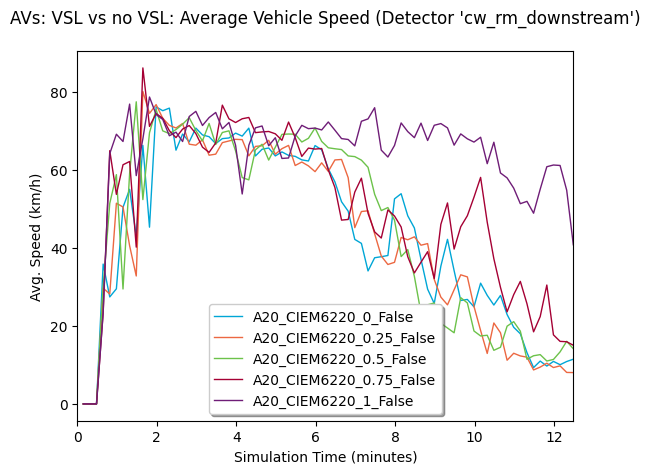

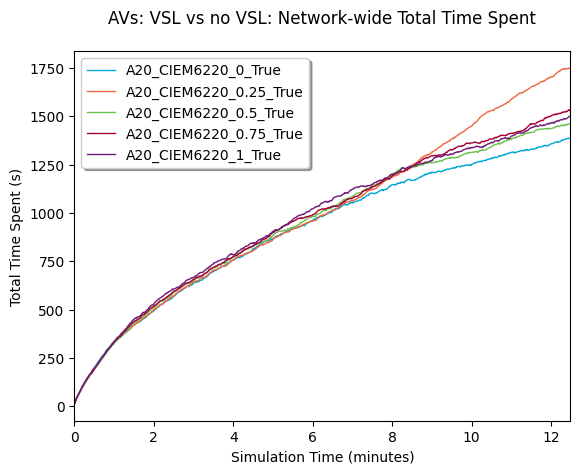

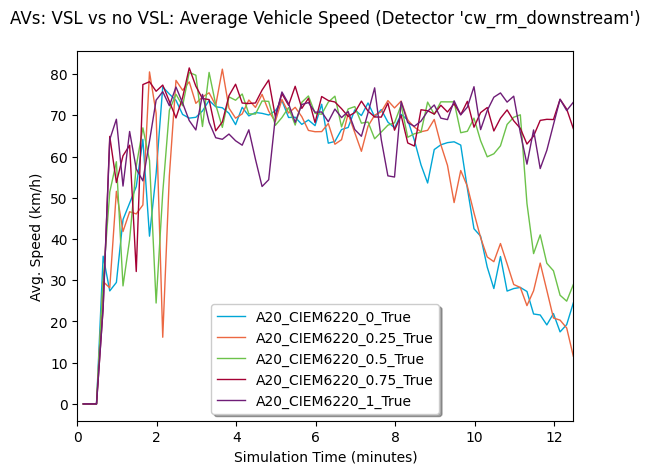

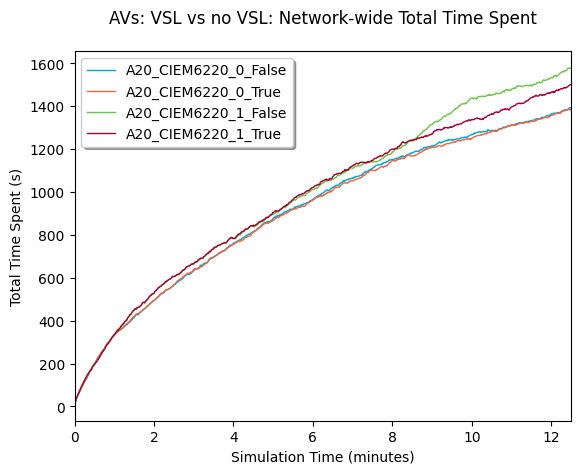

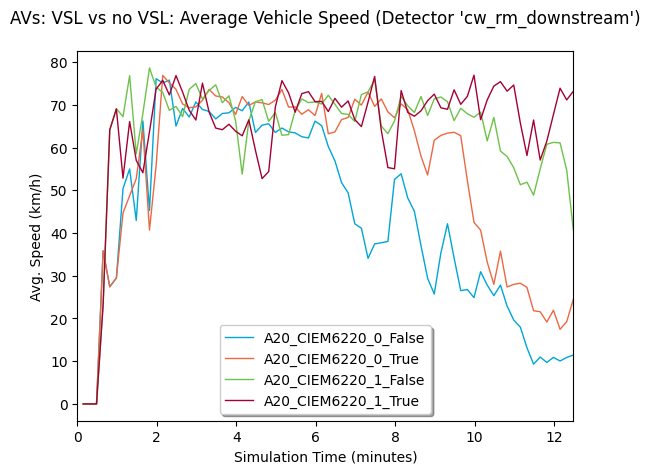

In [72]:
#Create group plots dynamically  based on the string above
simGroups=[]

for g in groups:
    simGroup=[]
    groupAVRates=g[0]
    groupVSLRates=g[1]
    for s in groupAVRates:
        for v in groupVSLRates:
            simGroup.append(base+str(s)+"_"+str(v)+ext)
    simGroups.append(simGroup)


#Plot them all

for g in simGroups:
    mplt = MultiPlotter(scenario_label="AVs: VSL vs no VSL",time_unit="minutes",sim_data_loc="/Users/mrinaldi/repos/ciem6220-exercises/experiments/")
    mplt.add_simulations(g)
    try:
        mplt.plot_vehicle_data(data_key="tts")
    except ValueError:
        pass
    
    try:
        mplt.plot_detector_data("cw_rm_downstream", "speeds", aggregation_steps=10)
    except ValueError:
        pass




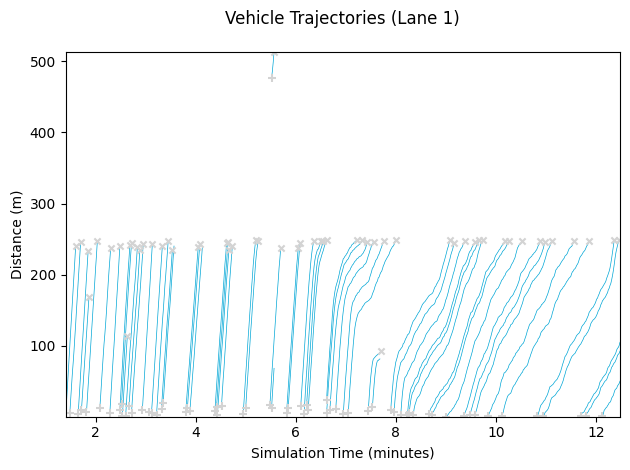

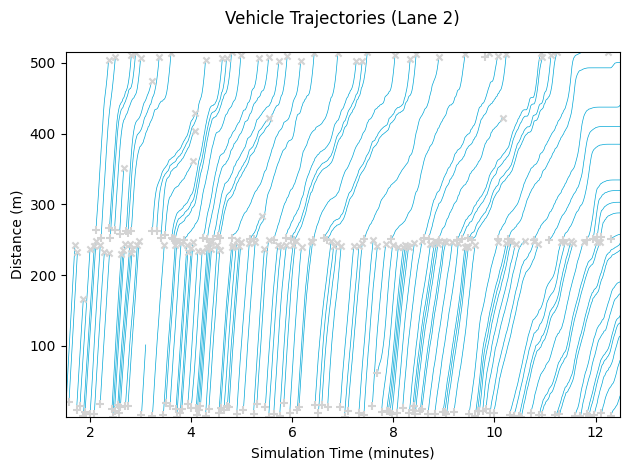

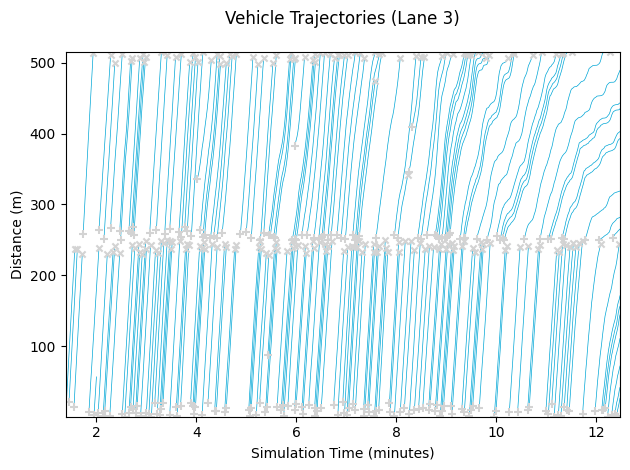

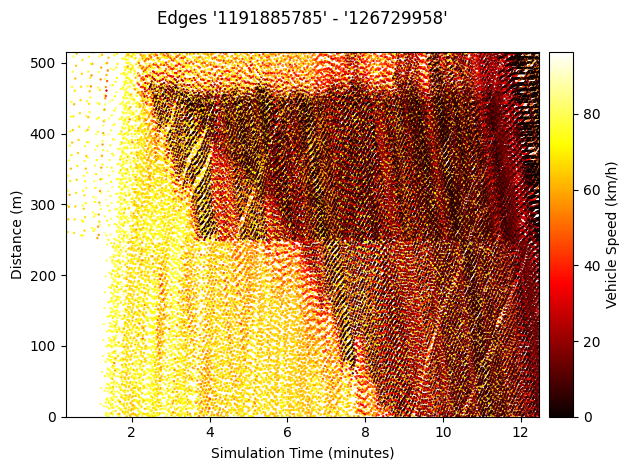

In [73]:
#Load up a specific one so we can look at the trajectories and speed diagram around the crooswijk weaving section
trackedEdges=["126729958","126710337","1191885785"]
plt = Plotter("/Users/mrinaldi/repos/ciem6220-exercises/experiments/A20_0_False.pkl",time_unit="minutes")
plt.plot_trajectories(trackedEdges,lane_idx=0,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_trajectories(trackedEdges,lane_idx=1,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_trajectories(trackedEdges,lane_idx=2,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_space_time_diagram(trackedEdges)


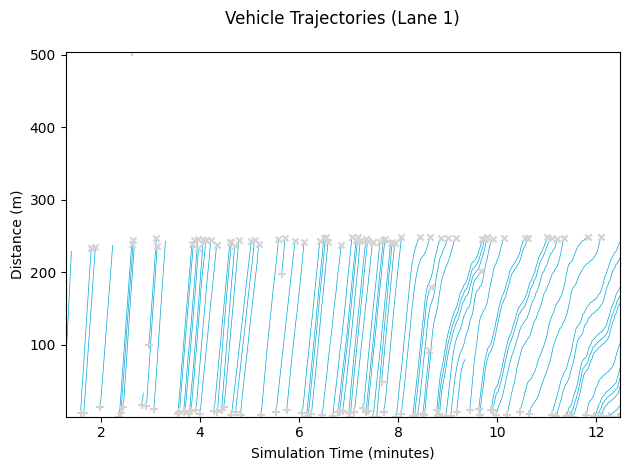

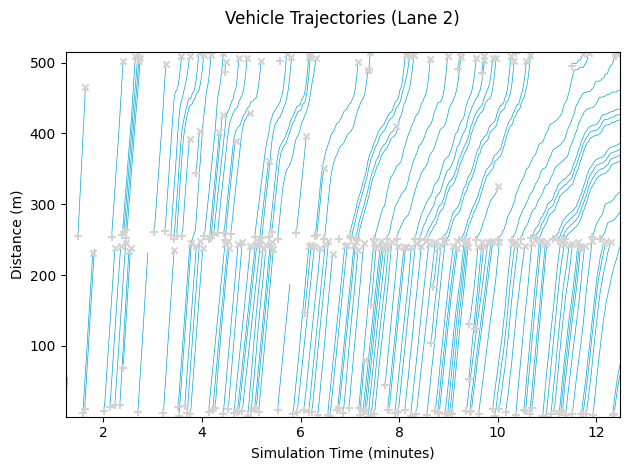

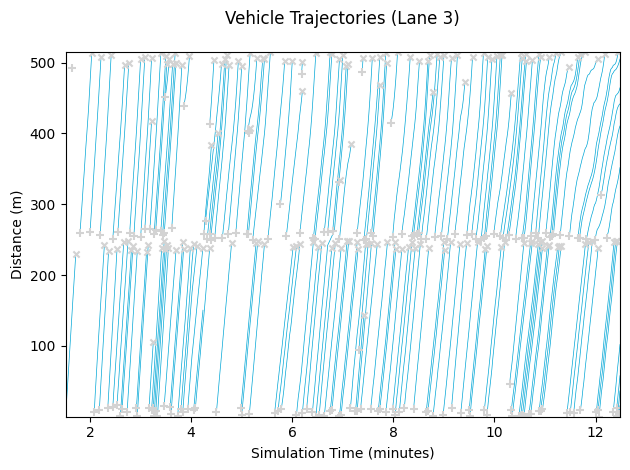

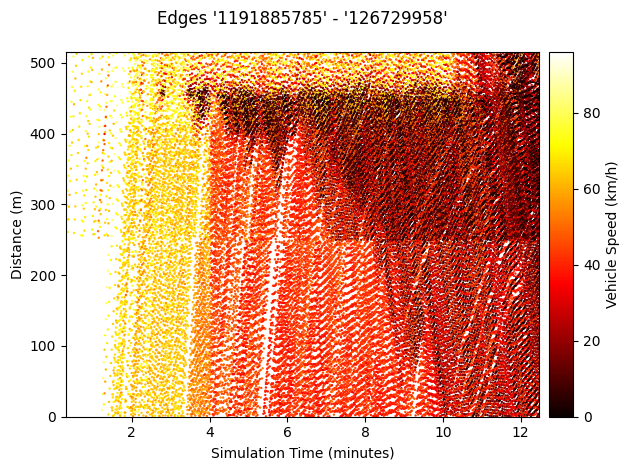

In [74]:
#Load up a specific one so we can look at the trajectories and speed diagram around the crooswijk weaving section
trackedEdges=["126729958","126710337","1191885785"]
plt = Plotter("/Users/mrinaldi/repos/ciem6220-exercises/experiments/A20_0_True.pkl",time_unit="minutes")
plt.plot_trajectories(trackedEdges,lane_idx=0,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_trajectories(trackedEdges,lane_idx=1,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_trajectories(trackedEdges,lane_idx=2,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_space_time_diagram(trackedEdges)

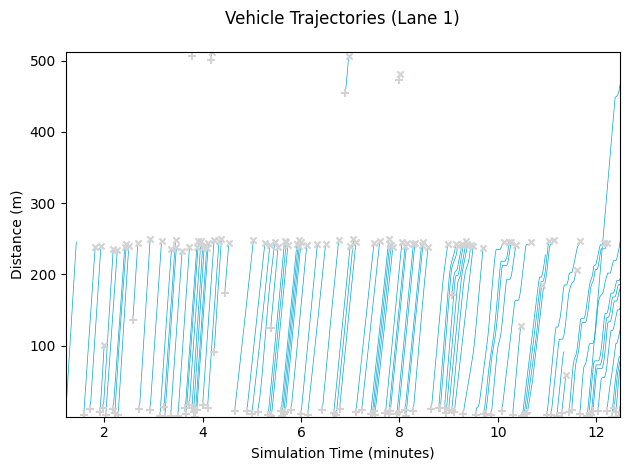

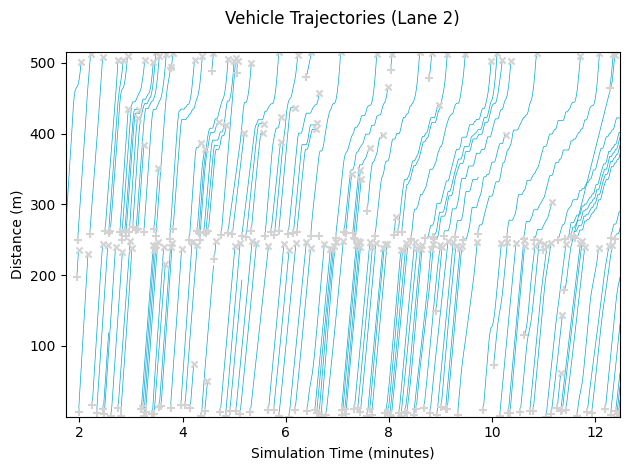

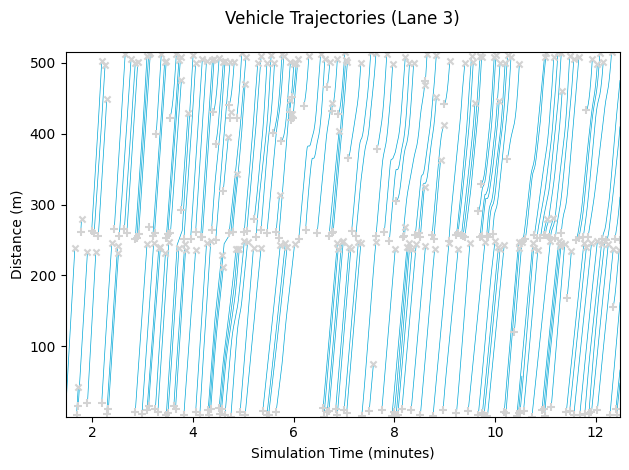

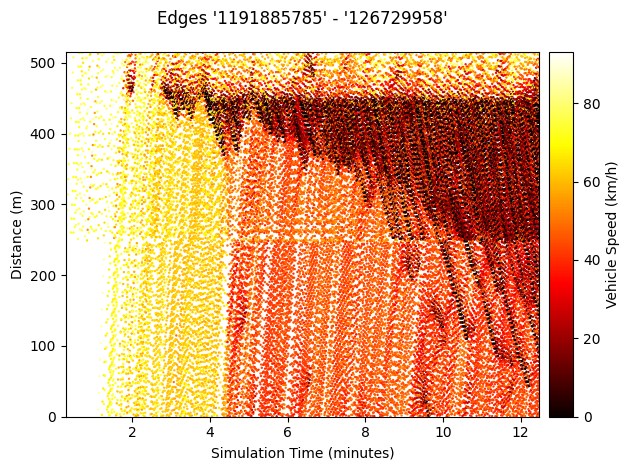

In [75]:
#Load up a specific one so we can look at the trajectories and speed diagram around the crooswijk weaving section
trackedEdges=["126729958","126710337","1191885785"]
plt = Plotter("/Users/mrinaldi/repos/ciem6220-exercises/experiments/A20_1_True.pkl",time_unit="minutes")
plt.plot_trajectories(trackedEdges,lane_idx=0,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_trajectories(trackedEdges,lane_idx=1,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_trajectories(trackedEdges,lane_idx=2,vehicle_pct=0.3) #Let's plot 30% of them for clarity
plt.plot_space_time_diagram(trackedEdges)

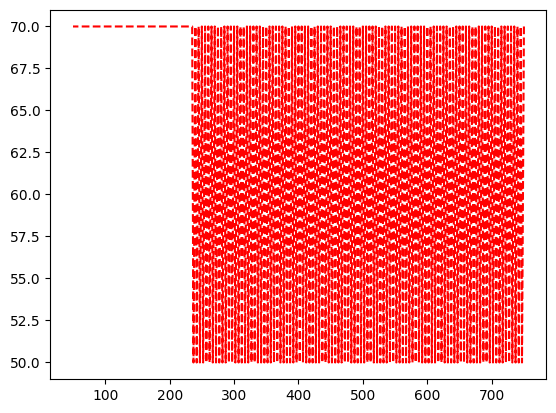

In [78]:
import matplotlib.pyplot as plt
from numpy import flip

past_sim=pd.read_pickle("/Users/mrinaldi/repos/ciem6220-exercises/experiments/A20_1_True.pkl")
vslActiveTimes=past_sim['data']['controllers']['vsl1']['activation_times']
plt.plot(*zip(*flip(vslActiveTimes[::5])),'r--')

In [ ]:
#import xml.etree.ElementTree as ET

In [ ]:
#scenario=scenarioNames[9]
#fname=scenario[:-4]+"_ssm.xml"
#pkname=scenario[:-4]+"_vehTypeDict.pkl"
#root = ET.parse("/Users/mrinaldi/repos/ciem6220-exercises/experiments/"+fname)

In [ ]:
#ego_dict = dict()
#ttc_span_dict = dict()
#for i, conflict in enumerate(root.findall("conflict")):
#    ego_dict[i] = conflict.get("ego")
#    for ttc_span in conflict.findall("TTCSpan"):
#        value_list = ttc_span.get("values", "").split(" ")
#        value_list = [float(val) for val in value_list if val != "NA"]
#    ttc_span_dict[i] = value_list

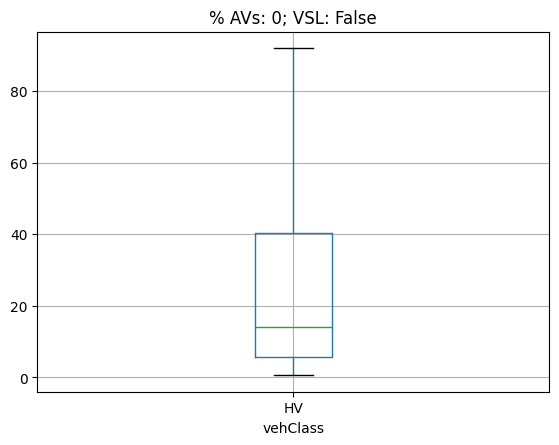

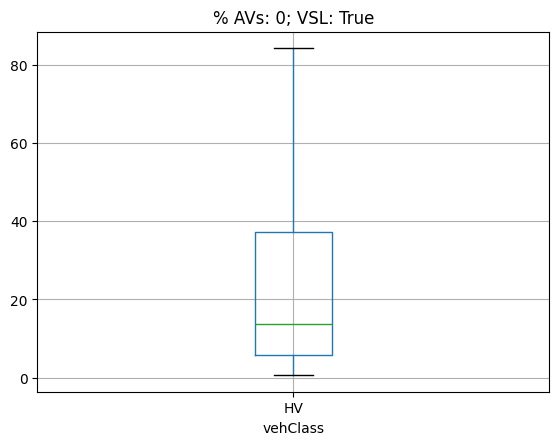

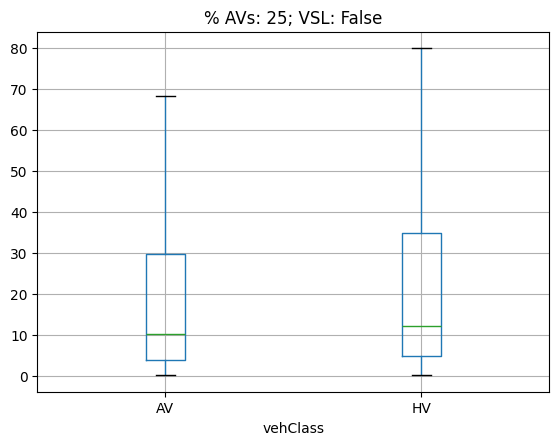

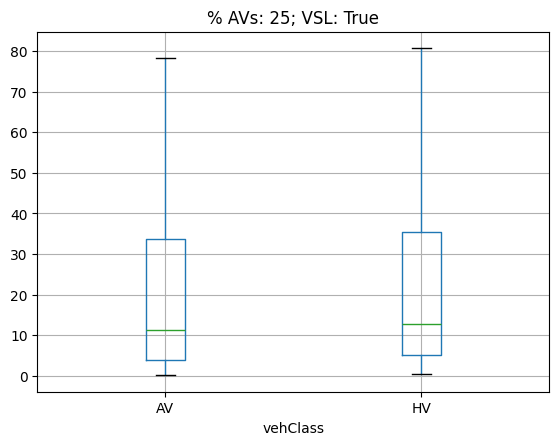

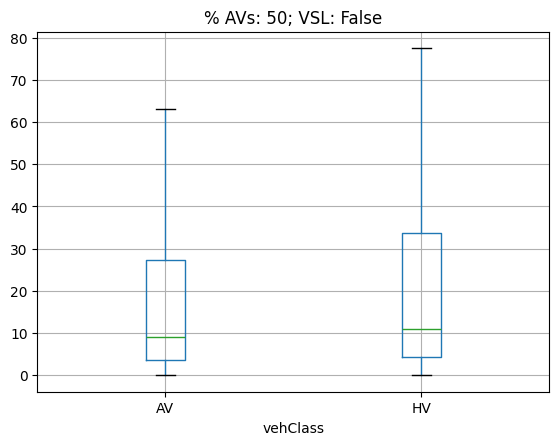

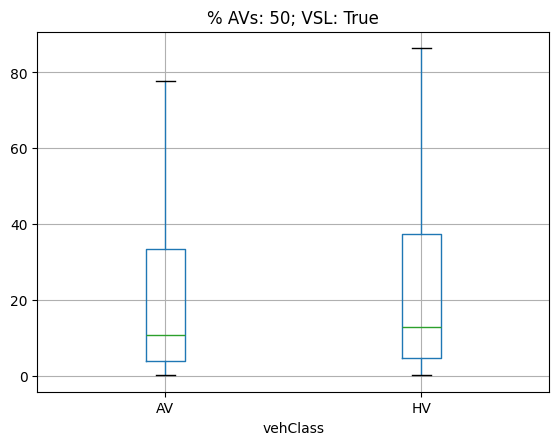

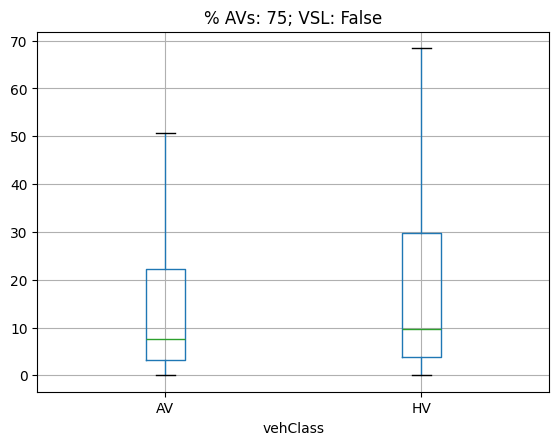

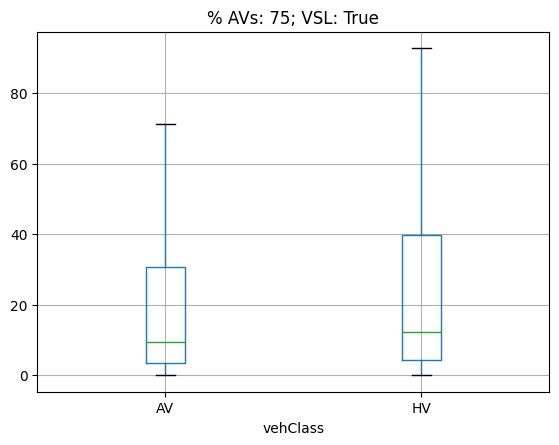

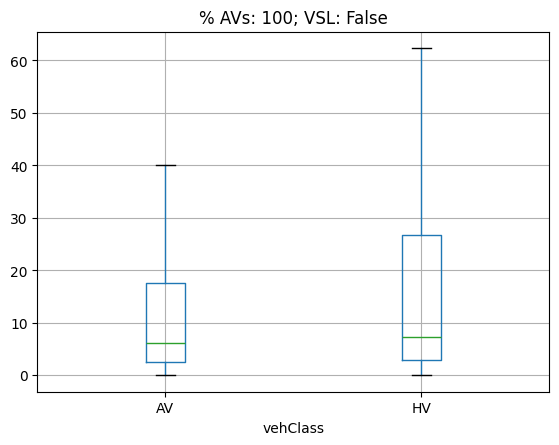

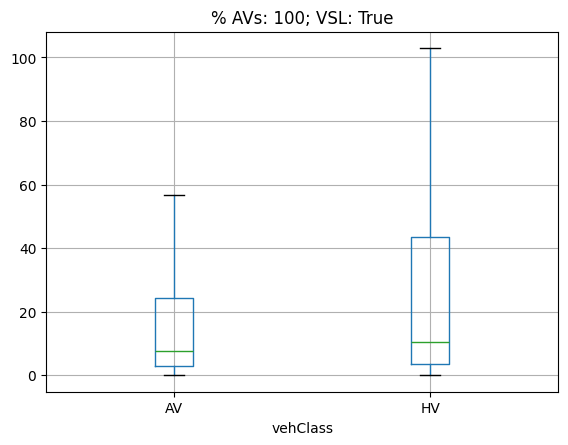

In [250]:
#Finally, extract and plot SSM distributions
#Most likely: boxplots, two series per simulation (HV, AV), two plots one True one False?

#scenario=scenarioNames[9] #fixed for now
for scenario in scenarioNames:
    fname=scenario[:-4]+"_ssm.xml"
    pkname=scenario[:-4]+"_vehTypeDict.pkl"
    df=pd.read_xml("/Users/mrinaldi/repos/ciem6220-exercises/experiments/"+fname, xpath="/SSMLog/conflict").reset_index()
    df2=pd.read_xml("/Users/mrinaldi/repos/ciem6220-exercises/experiments/"+fname, xpath="/SSMLog/conflict/TTCSpan").reset_index()
    df3=pd.merge(df,df2)
    #df3[['ego','type','value']].head(15)

    #Reread vehicle class dict similarly
    classDict=pd.read_pickle("/Users/mrinaldi/repos/ciem6220-exercises/experiments/"+pkname)

    #Apply a function to the dataframe so that another column type is generated, based on the dict information

    df3['vehClass']=df3['ego'].apply(lambda row: classDict[row])    

    df3['values_fl']=df3['values'].apply(lambda x: [float(v) for v in x.split(" ") if v != "NA"])

    df3 = df3.explode('values_fl')
    #For QoL: get scenario type from filename and set title accordingly
    
    scenarioPenRate=float(scenario.split("_")[1])
    scenarioVSLStatus=scenario.split("_")[2].split(".")[0] #in those situations where the extension is still included somehow
    df3.boxplot(column=["values_fl"],by="vehClass",showfliers=False).set_title(f"% AVs: {int(100*scenarioPenRate)}; VSL: {scenarioVSLStatus}").get_figure().suptitle("")
    

